In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special as sp

import time 

In [95]:
# utility functions
mu1, mu2 = 3, -1
sd1, sd2 = 1, 1
C01 = C10 = 1

def p0():
    return np.array([np.random.normal(mu1, sd1), np.random.normal(mu2, sd2)])

def p1():
    return np.array([np.random.laplace(0, 1), np.random.laplace(0, 1)])

def decision(y1, y2, pi):
    Ly = np.exp(-((y1 - mu1)**2 + (y2 - mu2)**2)/2) / (np.pi * np.exp(-np.abs(y1) - np.abs(y2)))
    
    tau = pi / (1-pi) * np.ones(y1.shape)
    
    return np.array(Ly >= tau, dtype=np.int32)

def getH(pi, n=int(1e2)):
    return np.random.binomial(1, pi, n)

Hmap = lambda x: p0() if x else p1()

(1000000, 2)
(1000000, 2)
(1000000, 2)
(1000000, 2)
(1000000, 2)
(1000000, 2)
(1000000, 2)
(1000000, 2)
(1000000, 2)


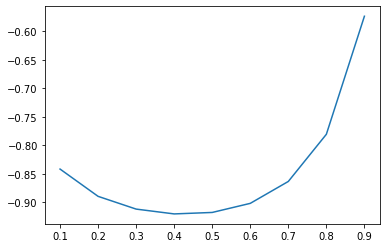

time taken 78.35198044776917


In [99]:
def simulate():
    sample_no = 9
    n = int(1e6)
    pi0 = np.linspace(0.1, 0.9, sample_no)
    ans = np.zeros((9, ))
        
    for k in range(sample_no):
        H = getH(pi0[k], n)
        
        bits = 1 - H
#         Y = np.array(list(map(Hmap, H)), dtype=np.float64)
        Y = np.array([Hmap(x) for x in H], dtype=np.float64)
        
        print(Y.shape)
        H_ = decision(Y[:, 0], Y[:, 1], pi0[k])
        
        # bits recovered
        bits_ = 1 - H_
        bit_error = (1 - np.sum(bits == bits_)) / n
        
        ans[k] = bit_error
    plt.plot(pi0, ans)
    plt.show()
    
start = time.time()
simulate()
print(f"time taken {time.time() - start}")

In [ ]:
time taken 78.70907473564148

In [110]:
a = np.linspace(0.1, 1, 10)
a = np.sort(np.hstack((a, [0.25])))
print(a)

[0.1  0.2  0.25 0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.  ]


In [119]:
n = int(1e6)
print(sum(np.random.binomial(1, 0.1, n)) / n)

0.099847


In [120]:
1 - 0.905

0.09499999999999997